In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class_label','alcohol','malic_acid']

In [9]:
df

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='malic_acid', ylabel='Density'>

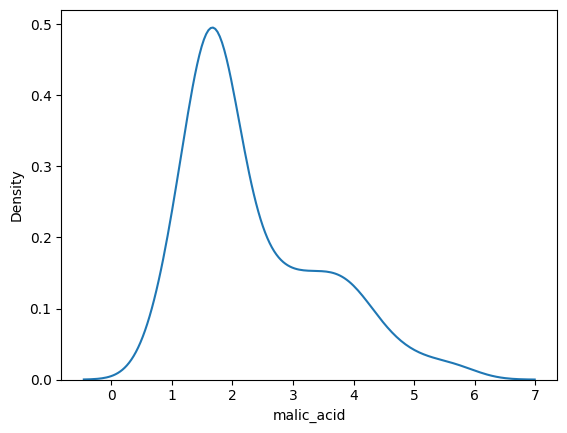

In [10]:
sns.kdeplot(df['malic_acid'])

<Axes: xlabel='alcohol', ylabel='Density'>

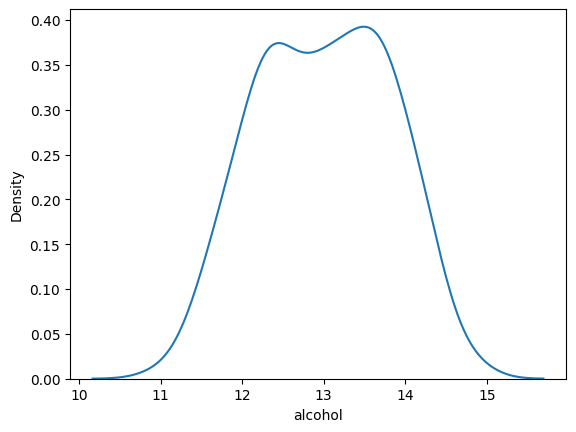

In [17]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='alcohol', ylabel='malic_acid'>

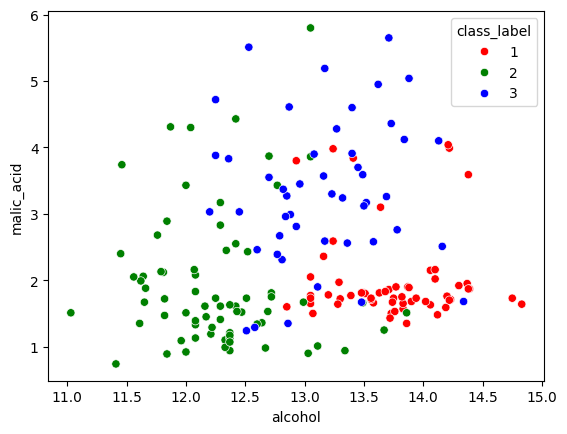

In [16]:
sns.scatterplot(x=df['alcohol'],y=df['malic_acid'],hue=df['class_label'],palette={1:'red',2:'green',3:'blue'})

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop("class_label",axis=1),df['class_label'],test_size=0.3,random_state=0)

In [21]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

 # MinMaxScaling 

In [30]:
from sklearn.preprocessing import MinMaxScaler 

scaler=MinMaxScaler()

scaler.fit(x_train)


x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [32]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns )
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns )

In [36]:
np.round(x_train.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [37]:
np.round(x_train_scaled.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


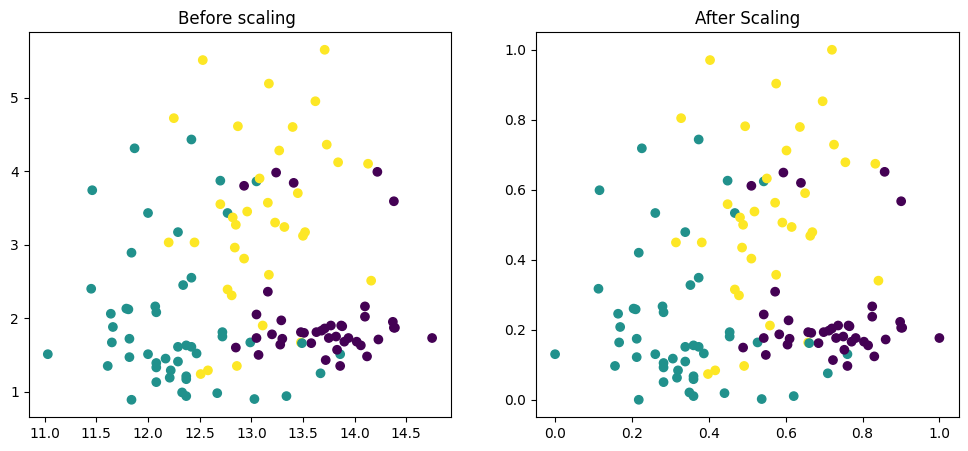

In [41]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['alcohol'],x_train['malic_acid'],c=y_train)
ax1.set_title("Before scaling ")
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['malic_acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()


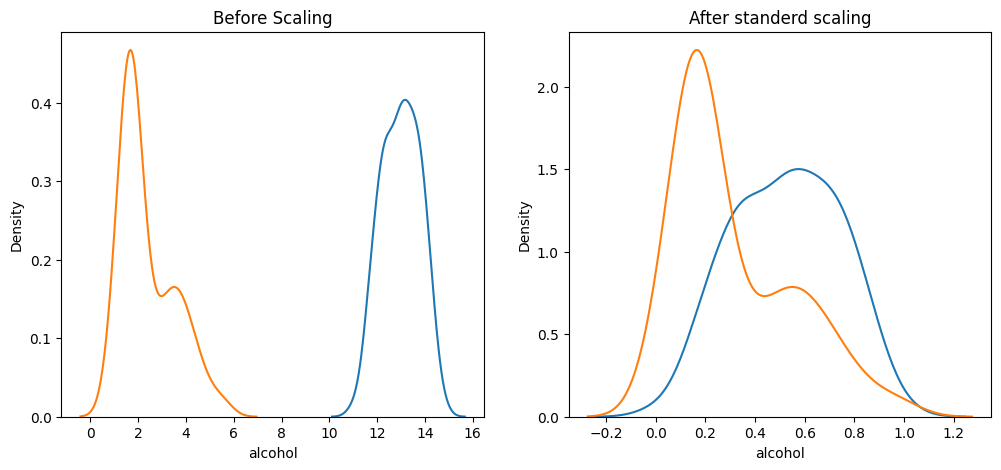

In [44]:
fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['alcohol'],ax=ax1)
sns.kdeplot(x_train['malic_acid'],ax=ax1)

ax2.set_title('After standerd scaling')
sns.kdeplot(x_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['malic_acid'],ax=ax2)
plt.show()